In [1]:
from fastcore.xtras import load_pickle
import pandas as pd 
import os 
from glob import glob
from pathlib import Path
from scipy.stats import sem
import matplotlib.pyplot as plt
from datetime import datetime

FOLDER = 'out'

import sys
sys.path.append("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/")
from plotutils import *

plt.style.use("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/kevin.mplstyle")

FOLDER = 'out'

In [2]:
if not os.path.exists(FOLDER):
    raise FileExistsError('Cannot find folder {}'.format(FOLDER))

all_res = glob(f'{FOLDER}/*.pkl')
print('Pickles found in {}: {}'.format(FOLDER, len(all_res)))

Pickles found in out: 45


In [3]:

compiled_res_list = []
conf_mats = []

for results in all_res:
    res_full = load_pickle(results)
    res = res_full['results']
    summary = {
        'size': res_full['train_size'],
        'representation': res_full['data_summary']['representation'],
        #'target': res_full['data_summary']['target'],
        'accuracy': res['accuracy'],
        'f1_macro': res['f1_macro'],
        'f1_micro': res['f1_micro'],
        'kappa': res['kappa'],
        'num_epochs': res_full['config']['tune_settings']['num_train_epochs'],
        'lr': res_full['config']['tune_settings']['learning_rate'],
        'bins': len(set(res['all_y_true']))
       
    }
    confusion_matrix = {
        'all_y_true':res['all_y_true'],
        'all_y_pred':res['all_y_pred']
    }
    conf_mats.append(confusion_matrix)
    compiled_res_list.append(summary)
print(compiled_res_list)

[{'size': 100, 'representation': 'SMILES', 'accuracy': 0.84, 'f1_macro': 0.84, 'f1_micro': 0.84, 'kappa': 0.6799999999999999, 'num_epochs': 15, 'lr': 0.0003, 'bins': 2}, {'size': 10, 'representation': 'SMILES', 'accuracy': 0.0, 'f1_macro': 0.0, 'f1_micro': 0.0, 'kappa': 0.0, 'num_epochs': 5, 'lr': 0.0003, 'bins': 2}, {'size': 250, 'representation': 'SMILES', 'accuracy': 0.9, 'f1_macro': 0.8996386993175431, 'f1_micro': 0.9, 'kappa': 0.8, 'num_epochs': 15, 'lr': 0.0003, 'bins': 2}, {'size': 500, 'representation': 'SMILES', 'accuracy': 0.96, 'f1_macro': 0.9599358974358975, 'f1_micro': 0.96, 'kappa': 0.9199999999999999, 'num_epochs': 25, 'lr': 0.0003, 'bins': 2}, {'size': 500, 'representation': 'SMILES', 'accuracy': 0.88, 'f1_macro': 0.88, 'f1_micro': 0.88, 'kappa': 0.76, 'num_epochs': 25, 'lr': 0.0003, 'bins': 2}, {'size': 10, 'representation': 'SMILES', 'accuracy': 0.6, 'f1_macro': 0.6, 'f1_micro': 0.6, 'kappa': 0.19999999999999996, 'num_epochs': 15, 'lr': 0.0003, 'bins': 2}, {'size': 10

In [4]:
compiled_res = pd.DataFrame(compiled_res_list)
grouped_res =compiled_res.groupby(['bins', 'num_epochs', 'representation', 'size']).agg(['mean', 'sem'])


In [5]:
grouped_res


accuracy            f1_macro            \
                                         mean       sem      mean       sem   
bins num_epochs representation size                                           
2    5          SMILES         10    0.000000  0.000000  0.000000  0.000000   
                               50    0.553333  0.026667  0.450522  0.058594   
                               100   0.640000  0.052915  0.628996  0.055138   
                               250   0.753333  0.054569  0.750393  0.056015   
                               500   0.873333  0.006667  0.873186  0.006621   
     15         SMILES         10    0.593333  0.006667  0.566885  0.022051   
                               50    0.680000  0.041633  0.678547  0.042452   
                               100   0.793333  0.024037  0.793176  0.024134   
                               250   0.846667  0.043716  0.846031  0.044154   
                               500   0.900000  0.020000  0.899992  0.019992   
     25         SMILES         10    0.493333  0.029059  0.457642  0.032190   
                               50    0.733333  0.026667  0.732390  0.027226   
                               100   0.786667  0.017638  0.786292  0.017536   
                               250   0.833333  0.054569  0.832703  0.054717   
                               500   0.940000  0.030551  0.939976  0.030542   

                                     f1_micro               kappa            \
                                         mean       sem      mean       sem   
bins num_epochs representation size                                           
2    5          SMILES         10    0.000000  0.000000  0.000000  0.000000   
                               50    0.553333  0.026667  0.106667  0.053333   
                               100   0.640000  0.052915  0.280000  0.105830   
                               250   0.753333  0.054569  0.506667  0.109138   
                               500   0.873333  0.006667  0.746667  0.013333   
     15         SMILES         10    0.593333  0.006667  0.186667  0.013333   
                               50    0.680000  0.041633  0.360000  0.083267   
                               100   0.793333  0.024037  0.586667  0.048074   
                               250   0.846667  0.043716  0.693333  0.087433   
                               500   0.900000  0.020000  0.800000  0.040000   
     25         SMILES         10    0.493333  0.029059 -0.013333  0.058119   
                               50    0.733333  0.026667  0.466667  0.053333   
                               100   0.786667  0.017638  0.573333  0.035277   
                               250   0.833333  0.054569  0.666667  0.109138   
                               500   0.940000  0.030551  0.880000  0.061101   

                                         lr       
                                       mean  sem  
bins num_epochs representation size               
2    5          SMILES         10    0.0003  0.0  
                               50    0.0003  0.0  
                               100   0.0003  0.0  
                               250   0.0003  0.0  
                               500   0.0003  0.0  
     15         SMILES         10    0.0003  0.0  
                               50    0.0003  0.0  
                               100   0.0003  0.0  
                               250   0.0003  0.0  
                               500   0.0003  0.0  
     25         SMILES         10    0.0003  0.0  
                               50    0.0003  0.0  
                               100   0.0003  0.0  
                               250   0.0003  0.0  
                               500   0.0003  0.0

/home/jorenvanherck/.local/lib/python3.11/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


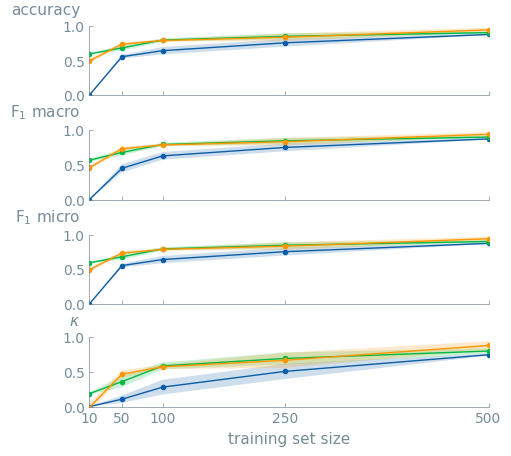

In [8]:
from scipy.stats import sem
from scipy.constants import golden
ONE_COL_WIDTH_INCH = 5
TWO_COL_WIDTH_INCH = 7.2

ONE_COL_GOLDEN_RATIO_HEIGHT_INCH = ONE_COL_WIDTH_INCH / golden
TWO_COL_GOLDEN_RATIO_HEIGHT_INCH = TWO_COL_WIDTH_INCH / golden

BINS = 2
REPRESENTATION = 'SMILES'

fig, ax = plt.subplots(4, 1,figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH),constrained_layout = True , sharex=True)
 
for num_epochs in [5, 15 ,25]:
    for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
        ax[i].plot(
            grouped_res.loc[BINS, num_epochs,REPRESENTATION].index, 
            grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['mean'],
            marker='o',
            label=f'{num_epochs} epochs'
        )
        ax[i].fill_between(
            grouped_res.loc[BINS, num_epochs,REPRESENTATION].index,
            grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['mean'] - grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['sem'],
            grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['mean'] + grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['sem'],
            alpha=0.2
        )
        ax[i].set_ylim(0,1)
        #ax[i].set_title(metric)
        ax[i].set_xticks((list(compiled_res['size'].unique())))
    ylabel_top('accuracy', ax=ax[0])
    ylabel_top(r'F$_1$ macro', ax=ax[1])
    ylabel_top(r'F$_1$ micro', ax=ax[2])
    ylabel_top(r'$\kappa$', ax=ax[3])
ax[-1].set_xlabel('training set size')


#matplotx.line_labels(ax[0])
now = datetime.now().strftime('%Y%m%d_%H%M') 
#fig.suptitle('Hydrides - {} - {}'.format(REPRESENTATION, 'binary'), fontsize=16)
fig.savefig(f'{now}-denis_barrierHeight-{REPRESENTATION}-binary-{BINS}bin-classification-results.pdf', bbox_inches='tight')